In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from vaa import VAA
from fixed_allocations import SPY, SixtyForty, FourSeasons, AllWeather, Permanent

In [2]:
vaa = VAA()
spy = SPY()
sf = SixtyForty()
fs = FourSeasons()
aw = AllWeather()
permanent = Permanent()

In [3]:
strategies = {'VAA': {'CAGR': vaa.cagr(), 'MDD': vaa.mdd()},
              'SPY': {'CAGR': spy.cagr(), 'MDD': spy.mdd()},
              'SixtyForty': {'CAGR': sf.cagr(), 'MDD': sf.mdd()},
              'FourSeasons': {'CAGR': fs.cagr(), 'MDD': fs.mdd()},
              'AllWeather': {'CAGR': aw.cagr(), 'MDD': aw.mdd()},
              'Permanent': {'CAGR': permanent.cagr(), 'MDD': permanent.mdd()}                
             }

0.9875932912539459


In [4]:
summary = pd.DataFrame(strategies)
summary

,VAA,SPY,SixtyForty,FourSeasons,AllWeather,Permanent
CAGR,0.063055,0.121619,0.073665,0.076515,0.081684,0.082984
MDD,-0.104069,-0.485807,-0.319047,-0.135792,-0.107827,-0.147842


In [5]:
cum_returns = {'VAA': vaa.port_cum_returns,
               'SPY': spy.port_cum_returns,
               'SixtyForty': sf.port_cum_returns,
               'FourSeasons': fs.port_cum_returns,
               'AllWeather': aw.port_cum_returns,
               'Permanent': permanent.port_cum_returns}

In [6]:
df_cum_returns = pd.DataFrame(cum_returns)
df_cum_returns.dropna(inplace=True)
df_cum_returns

,VAA,SPY,SixtyForty,FourSeasons,AllWeather,Permanent
2017-03-31,1.595831,5.343071,1.424900,1.602903,1.026458,1.948041
2017-05-31,1.587379,5.351037,1.425270,1.603608,1.023553,1.939499
2017-06-30,1.587379,5.461024,1.443962,1.615351,1.034035,1.956739
2017-07-31,1.634990,5.476957,1.450224,1.645376,1.054823,1.999953
2017-08-31,1.647169,5.690733,1.478914,1.645664,1.054070,1.977156
2017-10-31,1.647169,5.864675,1.504156,1.664642,1.066963,1.994375
2017-11-30,1.647169,6.238451,1.554662,1.689901,1.095873,2.030083
2018-01-31,1.647169,6.011618,1.512949,1.639810,1.054504,1.978456
2018-02-28,1.647169,5.853610,1.485286,1.637871,1.051517,1.966515
2018-04-30,1.647169,5.995906,1.509655,1.666680,1.053255,1.986681


In [7]:
for port in df_cum_returns.columns:
    df_cum_returns[port] = df_cum_returns[port] / df_cum_returns.loc[df_cum_returns.index[0],port]

In [8]:
df_cum_returns

,VAA,SPY,SixtyForty,FourSeasons,AllWeather,Permanent
2017-03-31,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2017-05-31,0.994704,1.001491,1.000260,1.000440,0.997169,0.995615
2017-06-30,0.994704,1.022076,1.013378,1.007766,1.007381,1.004465
2017-07-31,1.024538,1.025058,1.017773,1.026497,1.027634,1.026648
2017-08-31,1.032170,1.065068,1.037908,1.026677,1.026900,1.014946
2017-10-31,1.032170,1.097623,1.055622,1.038517,1.039460,1.023785
2017-11-30,1.032170,1.167578,1.091068,1.054275,1.067625,1.042115
2018-01-31,1.032170,1.125124,1.061794,1.023025,1.027322,1.015613
2018-02-28,1.032170,1.095552,1.042379,1.021816,1.024413,1.009483
2018-04-30,1.032170,1.122184,1.059482,1.039788,1.026106,1.019835


Text(0.5, 1.0, 'Portfolio Performance Comparison')

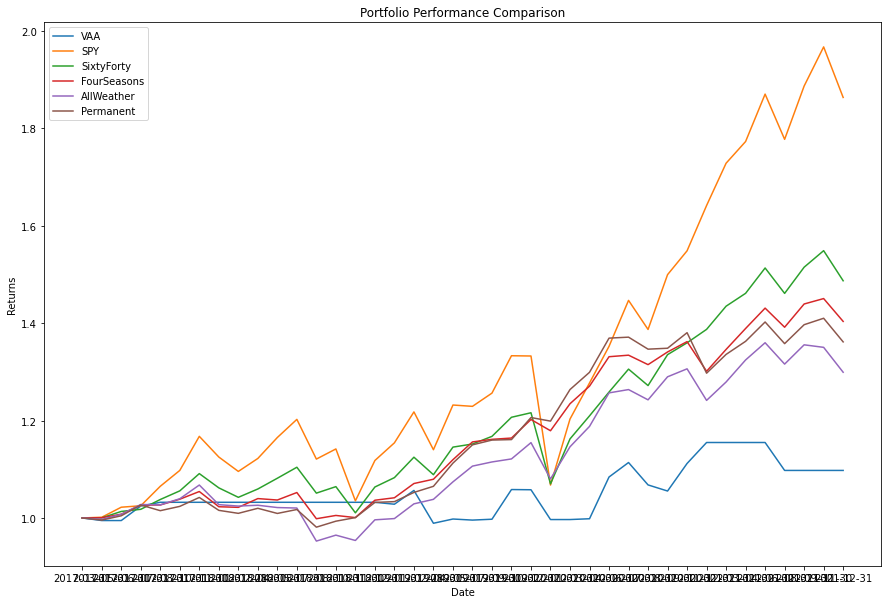

In [9]:
### Backtesting Performance Comparison (All Portfolios)
plt.figure(figsize=(15,10))
plt.plot(df_cum_returns)
plt.legend(df_cum_returns.columns)
plt.xlabel('Date')
plt.ylabel('Returns')
plt.title('Portfolio Performance Comparison')
### Backtesting Performance Comparison (Original VAA, 60/40, SPY)
# sub_df = combined_df[['VAA/Original', '60/40', 'SPY']]
# plt.figure(figsize=(15,10))
# plt.plot(sub_df)
# plt.legend(sub_df.columns)
# plt.xlabel('Date')
# plt.ylabel('Returns')
# plt.title('Portfolio Performance Comparison')